In [0]:
import matplotlib.pyplot as plt
import pandas as pd

- Dados da população mundial de 1980 a 2020

In [2]:
year = [1981,1991,2001,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
pop = [364.6,384.4,439.5,502.1,512.4,524.9,537.0,549.7,563.0,576.2,590.7,602.0,613.9]

int(year[-1])
print(pop[-1])

613.9


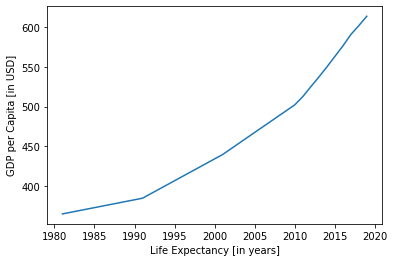

In [3]:
%matplotlib inline

# Strings
ylab = 'GDP per Capita [in USD]'
xlab = 'Life Expectancy [in years]'
title = 'World Development'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Make a line plot: year on the x-axis, pop on the y-axis
plt.plot(year,pop)

# Display the plot with plt.show()
plt.show()

## Importar csv direto do Google Drive


In [0]:
# Instale o PyDrive
!pip install -U -q PyDrive

In [0]:
# Faça o import das bibliotecas de autenticação e permissão do Google
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Faça a autenticação com sua conta do Google e crie o PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1etwsxEez5RQt2DcQJpMFC80PfxmrrMeD'

In [8]:
# Vamos  usar somente o ID, então separe o que tiver antes do símbolo =
fluff, id = link.split('=')
print(id)

1etwsxEez5RQt2DcQJpMFC80PfxmrrMeD


In [0]:
# Carregando o dataset para um DataFrame Pandas
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('life-expectancy-vs-gdp-per-capita.csv')
data = pd.read_csv('life-expectancy-vs-gdp-per-capita.csv')

## Ler do arquivo csv

In [0]:
data =  pd.read_csv('../datasets/life-expectancy-vs-gdp-per-capita.csv')

In [10]:
data.head()

,Entity,Code,Year,Life expectancy at birth (years),GDP per capita ($),Population by country
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1801,NaN,NaN,3280000.0
2,Afghanistan,AFG,1802,NaN,NaN,3280000.0
3,Afghanistan,AFG,1803,NaN,NaN,3280000.0
4,Afghanistan,AFG,1804,NaN,NaN,3280000.0


In [0]:
data = data[~data['Life expectancy at birth (years)'].isna()]

In [12]:
data.head()

,Entity,Code,Year,Life expectancy at birth (years),GDP per capita ($),Population by country
150,Afghanistan,AFG,1950,27.537001,2392.0,7752118.0
151,Afghanistan,AFG,1951,27.809999,2422.0,7839510.0
152,Afghanistan,AFG,1952,28.350000,2462.0,7934980.0
153,Afghanistan,AFG,1953,28.879999,2568.0,8038596.0
154,Afghanistan,AFG,1954,29.399000,2576.0,8150447.0


In [13]:
data.Entity.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Australia/New Zealand', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Caribbean', 'Central African Republic',
       'Central America', 'Central Asia', 'Chad', 'Channel Islands',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Eastern Africa', 'Eastern Asia',
       'Eastern Europe', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiop

In [0]:
qtd_count = len(data.Entity.unique())

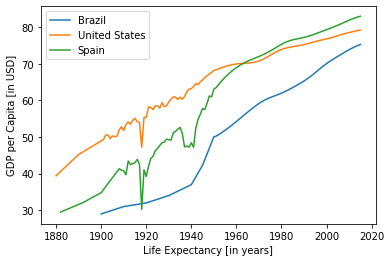

In [15]:
%matplotlib inline
# Make a line plot: year on the x-axis, pop on the y-axis

data_br = data[data['Entity'] == 'Brazil']
data_us = data[data['Entity'] == 'United States']
data_sp = data[data['Entity'] == 'Spain']

# Strings
ylab = 'GDP per Capita [in USD]'
xlab = 'Life Expectancy [in years]'
title = 'World Development'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

plt.plot(data_br['Year'],data_br['Life expectancy at birth (years)'], label='Brazil')
plt.plot(data_us['Year'],data_us['Life expectancy at birth (years)'], label ='United States')
plt.plot(data_sp['Year'],data_sp['Life expectancy at birth (years)'], label = 'Spain' )
# Display the plot with plt.show()
plt.legend()
plt.show()

- distribuição (scatterplot)

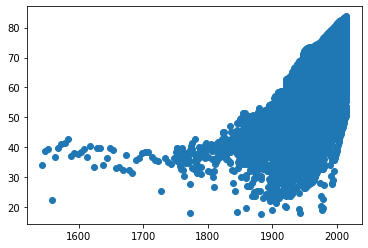

In [16]:
%matplotlib inline
plt.scatter(data['Year'],data['Life expectancy at birth (years)'])
plt.show()

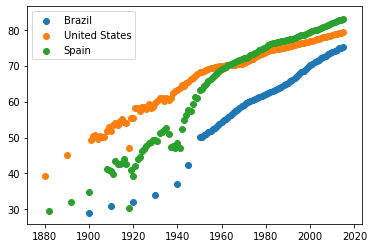

In [17]:
%matplotlib inline
plt.scatter(data_br['Year'],data_br['Life expectancy at birth (years)'], label ='Brazil')
plt.scatter(data_us['Year'],data_us['Life expectancy at birth (years)'], label ='United States')
plt.scatter(data_sp['Year'],data_sp['Life expectancy at birth (years)'], label = 'Spain' )
plt.legend()
plt.show()

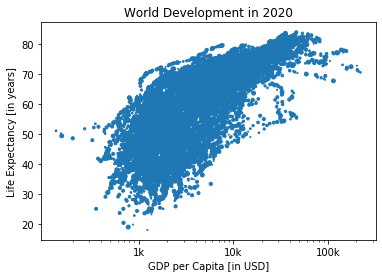

In [18]:
data_gdp = data[data['Year'] == 2020]
data_gdp = data[['GDP per capita ($)','Life expectancy at birth (years)']]

# Scatter plot
plt.scatter(data_gdp['GDP per capita ($)'], data_gdp['Life expectancy at birth (years)'], s = [1,3,5,7,9,10,15])

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2020')

# # Definition of tick_val and tick_lab
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']

# Adapt the ticks on the x-axis
plt.xticks(tick_val, tick_lab)

# After customizing, display the plot
plt.show()

- **Histograma (distribuição)**

Um histograma é uma ferramenta de análise e representação de dados quantitativos, agrupados em classes de freqüência que permite distinguir a forma, o ponto central e a variação da distribuição, além de outros dados como amplitude e simetria na distribuição dos dados.

Os histogramas podem ser classificados de acordo com algumas características:

* O “histograma simétrico” ou de “distribuição normal” apresenta uma freqüência mais alta no centro e que vai diminuindo conforme se aproxima das bordas. Ele representa processos estáveis e padronizados.

* O “histograma assimétrico” quando apresenta apenas um ponto mais alto (pico), geralmente, representa uma situação onde a característica de qualidade possui apenas um limite de especificação e é controlada durante todo o processo.

* O histograma chamado de “despenhadeiro”, ocorre quando foram eliminados dados o que corresponde ao “corte” na figura, dando a aparência de que o histograma está incompleto.

* O “histograma com dois picos” costuma acontecer quando há uma mistura de dados diferentes. Por exemplo, a análise de dois tipos de matérias-primas diferentes.

* O histograma do tipo “platô”, ocorre quando há diversas misturas de distribuições com médias diferentes.

* E, o histograma do tipo “ilha isolada”, ou “retângulos isolados”, representa um situação onde certamente houve alguma anormalidade no processo decorrente de alguma falha, erro de medição, etc.

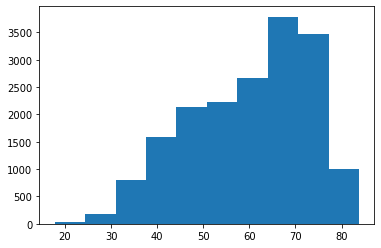

In [19]:
# Create histogram of life_exp data
plt.hist(data['Life expectancy at birth (years)'])

# Display histogram
plt.show()

No exemplo anterior, não foi especificado o número de bins. Por padrão, o Python define o número de bins para 10 nesse caso. O número de bins é bastante importante. Poucos bins simplificam demais a realidade e não mostram os detalhes. Muitos bins complicam demais a realidade e não mostram a imagem maior.
Para controlar o número de posições no qual dividir seus bins, você pode definir o argumento de posições.

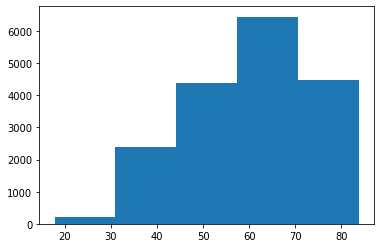

In [20]:
# Create histogram of life_exp data
plt.hist(data['Life expectancy at birth (years)'], bins=5)

# Display histogram
plt.show()

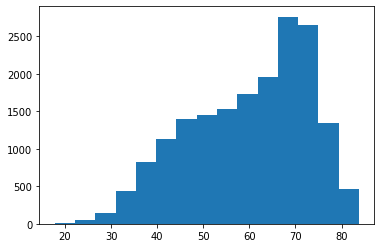

In [21]:
# Create histogram of life_exp data
plt.hist(data['Life expectancy at birth (years)'], bins=15)

# Display histogram
plt.show()

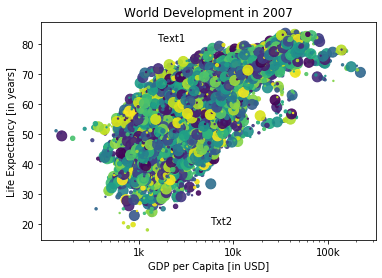

In [22]:
# Specify c and alpha inside plt.scatter()
%matplotlib inline

import numpy as np

data_gdp = data[data['Year'] == 2019]
data_gdp = data[['GDP per capita ($)','Life expectancy at birth (years)','Population by country']]
np.random.seed(19680801)
col = np.random.rand(len(data_gdp['GDP per capita ($)']))
plt.scatter(x = data_gdp['GDP per capita ($)'], y = data_gdp['Life expectancy at birth (years)'], s = np.array([1,3,5,10,50]) * 2, c = col, alpha=0.9)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Additional customizations
plt.text(1550, 81, 'Text1')
plt.text(5700, 20, 'Txt2')
# Show the plot
plt.show()